In [134]:
import pandas as pd
from dotenv import load_dotenv
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

load_dotenv()

True

In [135]:
zip_map = gpd.read_file("fl_florida_zip_codes_geo.min.json")
zip_codes = pd.read_csv("zip_code_database.csv")

In [136]:
zip_codes["county, state"] = zip_codes["county"] + ", " + zip_codes["state"]
zip_map["ZCTA5CE10"] = zip_map["ZCTA5CE10"].astype(int)
zip_map = zip_map.merge(zip_codes, how="left", left_on="ZCTA5CE10", right_on="zip")
zip_map = zip_map.drop(columns=zip_map.columns[zip_map.nunique()==1], index=0)
zip_map = zip_map.drop(columns=(["decommissioned", "type", "irs_estimated_population", "latitude", "longitude", "ZCTA5CE10", "AWATER10", "ALAND10", "GEOID10"]), axis=1)
zip_map = zip_map.dropna(axis=1)
zip_map["zip"] = zip_map["zip"].astype(str)

In [178]:
zip_map = zip_map[zip_map["primary_city"]=="Miami"]
zip_codes = zip_codes[(zip_codes["state"]=="FL")&(zip_codes["primary_city"]=="Miami")]

<Axes: >

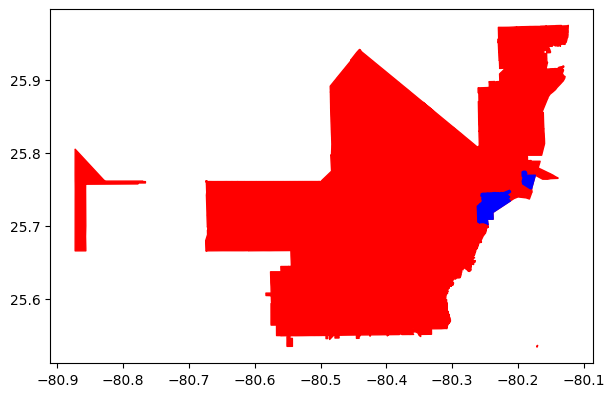

In [162]:
zip_codes_to_highlight = ["33131", "33133"] 
zip_map_codes = zip_map[zip_map["zip"].isin(zip_codes_to_highlight)]

fig, ax = plt.subplots(figsize=(7,7))

zip_map.plot(ax = ax, color="red", edgecolor="red", alpha=1)
zip_map_codes.plot(ax = ax, color="blue", edgecolor="blue", alpha=1)

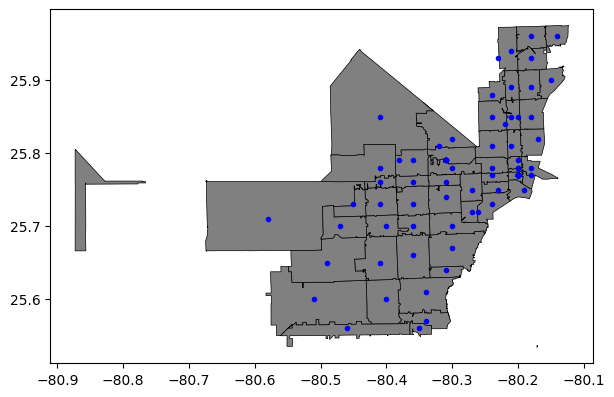

In [199]:
fig, ax=plt.subplots(figsize=(7,7))
zip_map.plot(ax = ax, color="gray", alpha=1, edgecolor="black", linewidth=0.5)
ax.scatter(x=zip_codes["longitude"], y=zip_codes["latitude"], color="blue", alpha=1, marker=".")

In [191]:
miami_housing = pd.read_csv("miami-housing.csv")
miami_housing.sort_values(by="SALE_PRC", ascending=False)

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
4782,25.695811,-80.258813,341320260660,2650000.0,15950,4750,31803,9016.4,3405.4,205.3,36478.2,18105.0,19005.1,6,0,4,5
4235,25.732342,-80.278463,341190013700,2650000.0,17780,5308,4606,4983.2,11707.8,1313.9,32424.5,8950.8,13057.8,36,0,8,5
1925,25.886322,-80.156193,622280113990,2650000.0,9375,4981,60030,4949.1,11512.4,6.5,41553.3,35735.4,17281.0,0,0,12,4
2636,25.811185,-80.128037,232270170660,2650000.0,7740,3677,30571,19943.9,2166.7,874.1,24633.1,7458.4,2627.2,1,0,6,3
4791,25.707024,-80.248267,341290410740,2639300.0,14000,4057,42802,8313.5,589.7,15.8,31152.2,15774.9,19494.0,15,0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,25.901797,-80.157755,722210030800,73000.0,2654,916,1342,967.4,11708.3,803.5,46884.0,41370.9,17059.2,66,0,9,1
929,25.913928,-80.236372,3421150081000,72000.0,5000,1581,2512,1804.4,37770.5,722.8,51863.5,51863.5,4550.1,67,0,10,4
480,25.889406,-80.200281,621250150660,72000.0,6840,993,1173,8737.2,25881.5,2013.9,40998.6,40998.6,2891.9,66,0,4,1
2078,25.837536,-80.228887,3031150056160,72000.0,4000,959,892,1113.3,33545.3,8162.6,25074.0,25074.0,7523.2,28,0,1,2


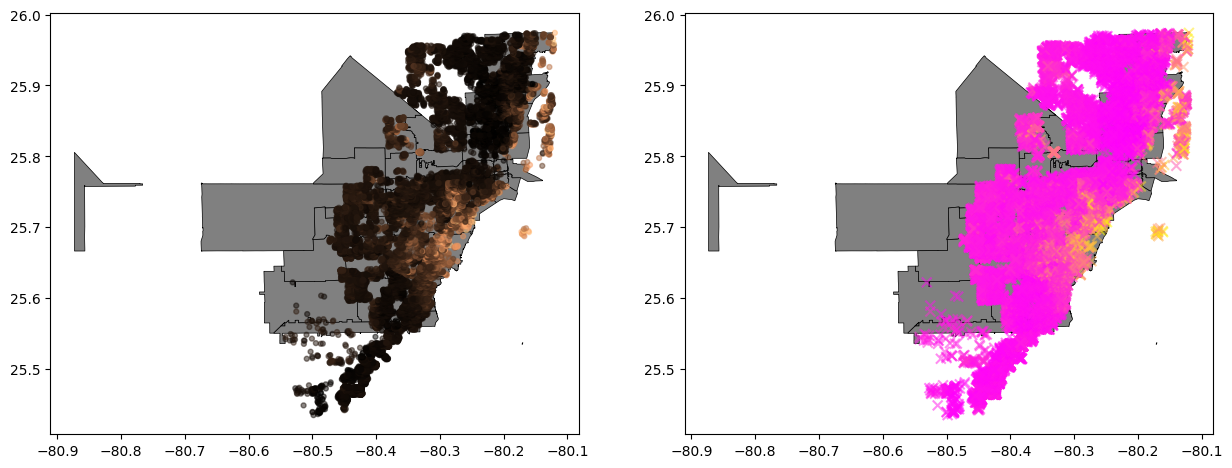

In [261]:
fig, ax=plt.subplots(figsize=(15,7), ncols=2)

#Map 1
zip_map.plot(ax = ax[0], color="gray", alpha=1, edgecolor="black", linewidth=0.5)
ax[0].scatter(x=miami_housing["LONGITUDE"], y=miami_housing["LATITUDE"], alpha=0.5, marker=".", c=miami_housing["SALE_PRC"], cmap="copper", s=50)

#Map 2
zip_map.plot(ax = ax[1], color="gray", alpha=1, edgecolor="black", linewidth=0.5)
ax[1].scatter(x=miami_housing["LONGITUDE"], y=miami_housing["LATITUDE"], alpha=0.5, marker="x", c=miami_housing["SALE_PRC"], cmap="spring", s=50)